In [1]:
# Import Dependencies and Initialize Sentiment Analyzer
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
#Get tweets from each news organization's twitter feeds.



# A list to hold sentiments.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1
#Create DataFrame.

news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Mon Jul 30 18:01:04 +0000 2018,0.000,1.000,0.000,What makes you resilient? https://t.co/cZS96s7bv0,0,@BBC
1,-0.4023,Mon Jul 30 17:03:05 +0000 2018,0.114,0.886,0.000,☔️ It turns out it's not just gratitude that m...,1,@BBC
2,0.0000,Mon Jul 30 16:03:04 +0000 2018,0.000,1.000,0.000,🐶 Advertising toilet paper using puppies! How ...,2,@BBC
3,0.0000,Mon Jul 30 14:03:08 +0000 2018,0.000,1.000,0.000,📸 Photographs from around the world of Friday'...,3,@BBC
4,-0.8074,Mon Jul 30 13:04:01 +0000 2018,0.300,0.700,0.000,A polar bear has been shot dead after it attac...,4,@BBC
5,0.2572,Mon Jul 30 12:01:06 +0000 2018,0.000,0.775,0.225,🐪🚁 When a sheepdog doesn't quite cut it... htt...,5,@BBC
6,0.0000,Mon Jul 30 11:56:23 +0000 2018,0.000,1.000,0.000,RT @BBCRadio4: BLOOPERS! \n@ProfBrianCox can't...,6,@BBC
7,0.0000,Mon Jul 30 11:03:01 +0000 2018,0.000,1.000,0.000,Why Americans will be able to 3D print their o...,7,@BBC
8,0.4767,Mon Jul 30 09:00:15 +0000 2018,0.000,0.871,0.129,❤️ The reaction when this little girl showed h...,8,@BBC
9,0.5562,Mon Jul 30 08:13:57 +0000 2018,0.000,0.796,0.204,Now this is an impressive line-up!\n\nGemma Ar...,9,@BBC


In [ ]:
#Export the DataFrame to as csv.

news_sentiments.to_csv("Twitter_News_Mood.csv", index=False)

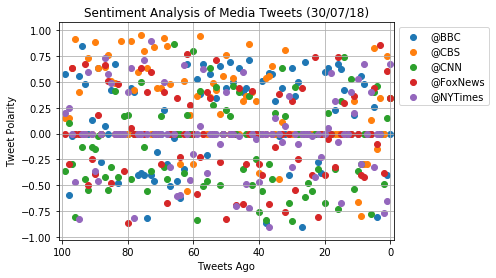

In [17]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))
now = datetime.now()
now = now.strftime("%d/%m/%y")

#Add title, x axis label, and y axis label.
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [18]:
#Calculate average sentiment
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.110119
@CBS        0.248360
@CNN       -0.098012
@FoxNews    0.002069
@NYTimes   -0.001049
Name: Compound, dtype: float64

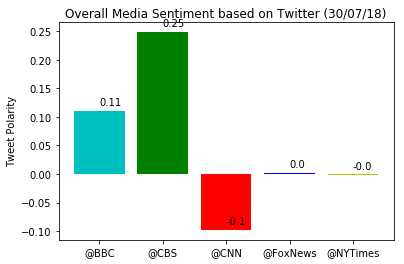

In [28]:
#Plot bar graph 
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0

#Loop on sentiment in average sentiment
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['c', 'g', 'r', 'b', 'y'])

#Set title, x axis label, and y axis label.
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.xlabel("News Organisations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()